In [1]:
# ---------------- IMPORTS -------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
# ---------------- LOAD DATA -------------------
data = pd.read_csv("./ML374_S6_Practice_BikeSales_Data.csv")  # change name if needed
X = data[['Unit_Cost']]      # Feature
y = data['Revenue']          # Target

In [7]:
# ---------------- SCALING -------------------
scalerX = StandardScaler()
scalery = StandardScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalery.fit_transform(np.array(y).reshape(-1, 1))


In [8]:
# ---------------- TRAIN TEST SPLIT -------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=200)

# ---------------- MODEL -------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# ---------------- RESIDUALS -------------------
residuals = y_test - y_pred


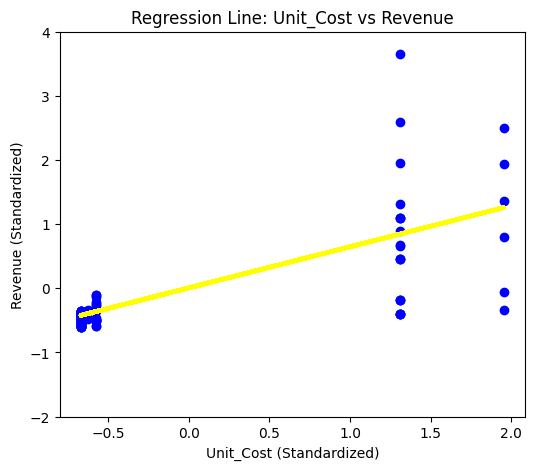

In [9]:
# ---------------- 1️⃣ PLOT REGRESSION LINE -------------------
plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='yellow', linewidth=3)
plt.title("Regression Line: Unit_Cost vs Revenue")
plt.xlabel("Unit_Cost (Standardized)")
plt.ylabel("Revenue (Standardized)")
plt.ylim(-2, 4)
plt.show()

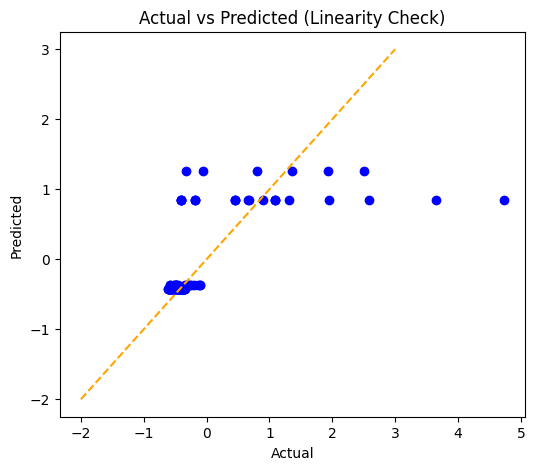

In [10]:
# ---------------- 2️⃣ CHECK LINEARITY -------------------
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([-2, 3], [-2, 3], color='orange', linestyle='--')  # 45 degree perfect line
plt.title("Actual vs Predicted (Linearity Check)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Text(0, 0.5, 'Residuals')

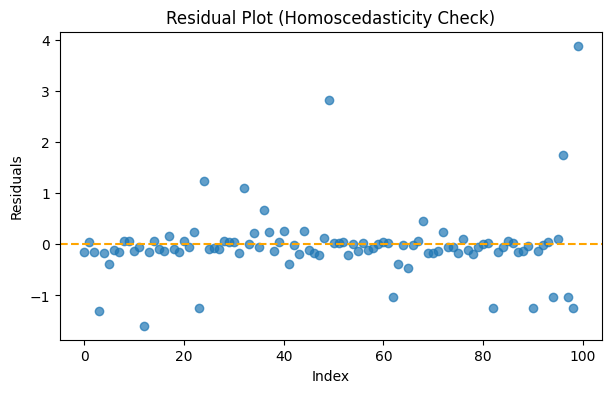

In [11]:
# ---------------- 3️⃣ CHECK HOMOSCEDASTICITY -------------------
plt.figure(figsize=(7, 4))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(y=0, color='orange', linestyle='--')
plt.title("Residual Plot (Homoscedasticity Check)")
plt.xlabel("Index")
plt.ylabel("Residuals")

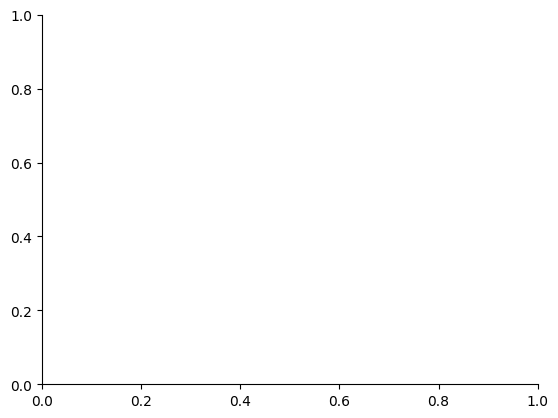

In [12]:
# remove top + right border to copy your style
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

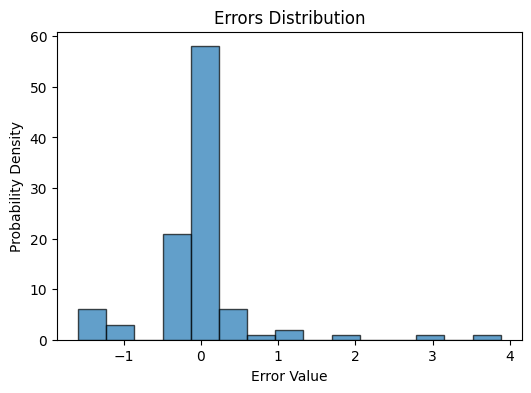

In [13]:
# ---------------- 4️⃣ RESIDUAL DISTRIBUTION -------------------
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
plt.title("Errors Distribution")
plt.xlabel("Error Value")
plt.ylabel("Probability Density")
plt.show()